<a href="https://colab.research.google.com/github/ShitangshuMaity/my_work/blob/master/MMA_869_ML_Cup_Diabetes_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
print(datetime.datetime.now())
!which python

2021-12-03 00:44:51.859986
/usr/local/bin/python


In [ ]:
!python --version

Python 3.7.12


In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

In [ ]:
# mounting the google drive to google colab
# to access the csv files

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
print("loading the path to access the csv files")
path_train = ("/content/drive/MyDrive/MMA 869 Kaggle Diabetes/diabetes_train.csv")
path_test = ("/content/drive/MyDrive/MMA 869 Kaggle Diabetes/diabetes_test.csv")

loading the path to access the csv files


In [ ]:
print("Reading the Train & Test Data Sets\n")
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)
print("Dimensions of Train Data Set:", train.shape)
print("\nDimensions of Test Data Set:", test.shape,"\n")

train.info()
test.info()

Reading the Train & Test Data Sets

Dimensions of Train Data Set: (576, 10)

Dimensions of Test Data Set: (192, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  576 non-null    int64  
 1   num_times_pregnant  576 non-null    int64  
 2   plasma_glucose      576 non-null    int64  
 3   DBP                 576 non-null    int64  
 4   triceps_skin        576 non-null    int64  
 5   serum_insulin       576 non-null    int64  
 6   BMI                 576 non-null    float64
 7   pedigree            576 non-null    float64
 8   age                 576 non-null    int64  
 9   diabetes            576 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 45.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column              Non-Null C

In [ ]:
train.head(5)

,Id,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,diabetes
0,358,13,129,0,30,0,39.9,0.569,44,1
1,74,4,129,86,20,270,35.1,0.231,23,0
2,353,3,61,82,28,0,34.4,0.243,46,0
3,498,2,81,72,15,76,30.1,0.547,25,0
4,146,0,102,75,23,0,0.0,0.572,21,0


In [ ]:
test.head(5)

,Id,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
0,669,6,98,58,33,190,34.0,0.430,43
1,325,2,112,75,32,0,35.7,0.148,21
2,625,2,108,64,0,0,30.8,0.158,21
3,691,8,107,80,0,0,24.6,0.856,34
4,474,7,136,90,0,0,29.9,0.210,50


In [ ]:
print("\nMissing Data: ")
print(train.isnull().mean()*100)


Missing Data: 
Id                    0.0
num_times_pregnant    0.0
plasma_glucose        0.0
DBP                   0.0
triceps_skin          0.0
serum_insulin         0.0
BMI                   0.0
pedigree              0.0
age                   0.0
diabetes              0.0
dtype: float64


In [ ]:
print("Count of Unique value of Target Variable:\n", train['diabetes'].nunique())

print("Number of Zero's:", (train['diabetes'] == 0).sum())
print("Number of One's:", (train['diabetes'] == 1).sum())

Count of Unique value of Target Variable:
 2
Number of Zero's: 377
Number of One's: 199


Diabetic VS Non-Diabetic
 AxesSubplot(0.125,0.125;0.775x0.755) 

0-No Diabetes
1-Diabetes


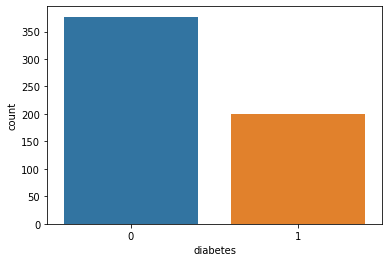

In [ ]:
print("Diabetic VS Non-Diabetic\n", sns.countplot(x='diabetes',data=train, ),"\n")
print("0-No Diabetes")
print("1-Diabetes")

Distribution of Diabetes Across Age



(array([234., 112.,  70.,  63.,  42.,  27.,  13.,  10.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <a list of 10 Patch objects>)

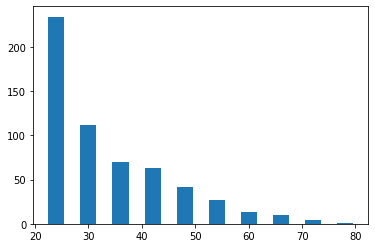

In [ ]:
print("Distribution of Diabetes Across Age\n")
plt.hist(train.age, rwidth= 0.5)

In [ ]:
print("Number of Zero's in variable num_times_pregnant:", ((train['num_times_pregnant'] == 0).sum()/train['num_times_pregnant'].count()*100),"%")
print("Number of Zero's: in variable plasma_glucose:", ((train['plasma_glucose'] == 0).sum()/train['plasma_glucose'].count()*100),"%")
print("Number of Zero's in varibale DBP:", ((train['DBP'] == 0).sum()/train['DBP'].count()*100),"%")
print("Number of Zero's in variable triceps_skin:", ((train['triceps_skin'] == 0).sum()/train['triceps_skin'].count()*100),"%")
print("Number of Zero's in variable serum_insulin:", ((train['serum_insulin'] == 0).sum()/train['serum_insulin'].count()*100),"%")
print("Number of Zero's in variable BMI:", ((train['BMI'] == 0).sum()/train['BMI'].count()*100),"%")
print("Number of Zero's in variable pedigree:", ((train['pedigree'] == 0).sum()/train['pedigree'].count()*100),"%")
print("Number of Zero's in variable age:", ((train['age'] == 0).sum()/train['age'].count()*100),"%")

Number of Zero's in variable num_times_pregnant: 14.930555555555555 %
Number of Zero's: in variable plasma_glucose: 0.8680555555555556 %
Number of Zero's in varibale DBP: 3.8194444444444446 %
Number of Zero's in variable triceps_skin: 28.47222222222222 %
Number of Zero's in variable serum_insulin: 47.91666666666667 %
Number of Zero's in variable BMI: 1.0416666666666665 %
Number of Zero's in variable pedigree: 0.0 %
Number of Zero's in variable age: 0.0 %


In [ ]:
print("\nColumn Name         % Null Values\n")
print(((train[:] == 0).sum())/train[:].count()*100)

colnamenull = round((((train[:] == 0).sum())/train[:].count()*100),2)
print(colnamenull)


Column Name         % Null Values

Id                     0.000000
num_times_pregnant    14.930556
plasma_glucose         0.868056
DBP                    3.819444
triceps_skin          28.472222
serum_insulin         47.916667
BMI                    1.041667
pedigree               0.000000
age                    0.000000
diabetes              65.451389
dtype: float64
Id                     0.00
num_times_pregnant    14.93
plasma_glucose         0.87
DBP                    3.82
triceps_skin          28.47
serum_insulin         47.92
BMI                    1.04
pedigree               0.00
age                    0.00
diabetes              65.45
dtype: float64


In [ ]:
print("CORRELATION BETWEEN DIFFERENT VARIABLES\n")
train.corr()

CORRELATION BETWEEN DIFFERENT VARIABLES



,Id,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,diabetes
Id,1.000000,-0.047391,0.008874,-0.027607,-0.007282,-0.010534,0.014377,-0.045672,0.001413,-0.038006
num_times_pregnant,-0.047391,1.000000,0.138674,0.158280,-0.073347,-0.073807,0.036466,-0.023148,0.548398,0.207252
plasma_glucose,0.008874,0.138674,1.000000,0.156389,0.023878,0.348452,0.210237,0.158231,0.258958,0.473145
DBP,-0.027607,0.158280,0.156389,1.000000,0.161798,0.069441,0.224697,0.034222,0.241381,0.089261
triceps_skin,-0.007282,-0.073347,0.023878,0.161798,1.000000,0.421019,0.376571,0.171797,-0.150866,0.070013
serum_insulin,-0.010534,-0.073807,0.348452,0.069441,0.421019,1.000000,0.178234,0.161418,-0.046338,0.126352
BMI,0.014377,0.036466,0.210237,0.224697,0.376571,0.178234,1.000000,0.123487,0.017513,0.315124
pedigree,-0.045672,-0.023148,0.158231,0.034222,0.171797,0.161418,0.123487,1.000000,0.026399,0.146702
age,0.001413,0.548398,0.258958,0.241381,-0.150866,-0.046338,0.017513,0.026399,1.000000,0.284689
diabetes,-0.038006,0.207252,0.473145,0.089261,0.070013,0.126352,0.315124,0.146702,0.284689,1.000000


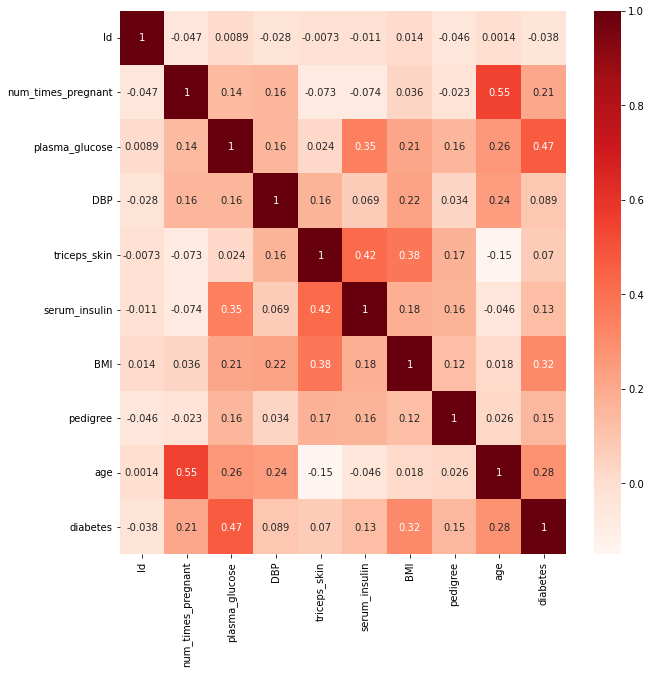

In [ ]:
corr = train.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,xticklabels=True, yticklabels=True, cmap='Reds', annot=True)
plt.show()

In [ ]:
x = train.drop(['diabetes','triceps_skin','serum_insulin'], axis=1)

y = train['diabetes']


In [ ]:
x.head(5)

,Id,num_times_pregnant,plasma_glucose,DBP,BMI,pedigree,age
0,358,13,129,0,39.9,0.569,44
1,74,4,129,86,35.1,0.231,23
2,353,3,61,82,34.4,0.243,46
3,498,2,81,72,30.1,0.547,25
4,146,0,102,75,0.0,0.572,21


In [ ]:
y.head(5)

0    1
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [ ]:
# Doing Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred=model.predict(x_val)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
acc = accuracy_score(y_val, y_pred,normalize=True)
print("Accuracy: %.2f%%" % (acc * 100.0))

Accuracy: 81.25%


In [ ]:
print(classification_report(y_val,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87        98
           1       0.74      0.63      0.68        46

    accuracy                           0.81       144
   macro avg       0.79      0.76      0.77       144
weighted avg       0.81      0.81      0.81       144



In [ ]:
cfm = confusion_matrix(y_val,y_pred)
print("Confusion Matrix:\n", cfm, "\n")

trueNegative=cfm[0][0]
falsePositive=cfm[0][1]
falseNegative=cfm[1][0]
truePositive=cfm[1][1]

print("\nCONFUSION MATRIX      VALUES\n")
print("True Negative:        ", trueNegative)
print("False Positive:       ", falsePositive)
print("False Negative:       ", falseNegative)
print("True Positive:        ", truePositive)


Confusion Matrix:
 [[88 10]
 [17 29]] 


CONFUSION MATRIX      VALUES

True Negative:         88
False Positive:        10
False Negative:        17
True Positive:         29


In [ ]:
# Make predictions on Test Data Set

x_test = test.drop(['triceps_skin','serum_insulin'], axis=1)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  192 non-null    int64  
 1   num_times_pregnant  192 non-null    int64  
 2   plasma_glucose      192 non-null    int64  
 3   DBP                 192 non-null    int64  
 4   triceps_skin        192 non-null    int64  
 5   serum_insulin       192 non-null    int64  
 6   BMI                 192 non-null    float64
 7   pedigree            192 non-null    float64
 8   age                 192 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 13.6 KB


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  192 non-null    int64  
 1   num_times_pregnant  192 non-null    int64  
 2   plasma_glucose      192 non-null    int64  
 3   DBP                 192 non-null    int64  
 4   BMI                 192 non-null    float64
 5   pedigree            192 non-null    float64
 6   age                 192 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 10.6 KB


In [ ]:
predict = model.predict(x_test)

In [ ]:
print("Prediced Value:", predict)

Prediced Value: [0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0]


In [ ]:
my_submission = pd.DataFrame({'Id':test.Id, 'Predicted':predict})

my_submission.head(5)

,Id,Predicted
0,669,0
1,325,0
2,625,0
3,691,0
4,474,0


In [ ]:
my_submission.to_csv("my_submission_LogReg_Shitangshu_Maity.csv", index=False, header=True)

from google.colab import files
files.download("my_submission_LogReg_Shitangshu_Maity.csv")

my_submission.to_csv("/content/drive/MyDrive/MMA 869 Kaggle Diabetes/my_submission_LogReg_Shitangshu_Maity.csv", index=False, header=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>